In [17]:
import wget
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd

%matplotlib inline

In [2]:
url_data = "http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"
url_dict = "http://187.191.75.115/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip"
curr_dir = os.getcwd()
file_data = "datos_abiertos_covid19.zip"

if "diccionario_datos_covid19.zip" not in os.listdir():
    wget.download(url_dict, os.path.join(curr_dir, "diccionario_datos_covid19.zip" ))

# elimina archivos previos
for file in os.listdir():
    if ".csv" in file or file == file_data:
        os.remove(file)
# descarga 
wget.download(url_data, os.path.join(curr_dir,file_data))

# descompresión
with ZipFile(file_data, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
200415COVID19MEXICO.csv                        2020-04-15 16:01:08      6242577
Extracting all the files now...
Done!


In [3]:
# identifica el archivo con datos
for file in os.listdir():
    if ".csv" in file:
        name_file = file
print(name_file)
df = pd.read_csv(name_file, encoding = "latin-1")

200415COVID19MEXICO.csv


In [4]:
df.head()

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-15,2,9,15,1,15,15,37,2,2020-04-09,...,2,2,2,2,2,1,99,99,97,1
1,2020-04-15,2,9,28,2,16,28,32,1,2020-04-06,...,2,2,2,2,1,1,99,99,97,97
2,2020-04-15,1,12,15,2,15,15,31,2,2020-04-06,...,2,2,2,2,2,2,99,99,97,2
3,2020-04-15,2,12,9,2,99,9,8,1,2020-04-15,...,2,2,2,2,1,3,99,99,97,97
4,2020-04-15,1,4,2,2,21,2,4,2,2020-04-02,...,2,1,2,2,99,2,99,MÃ©xico,97,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41593 entries, 0 to 41592
Data columns (total 34 columns):
FECHA_ACTUALIZACION    41593 non-null object
ORIGEN                 41593 non-null int64
SECTOR                 41593 non-null int64
ENTIDAD_UM             41593 non-null int64
SEXO                   41593 non-null int64
ENTIDAD_NAC            41593 non-null int64
ENTIDAD_RES            41593 non-null int64
MUNICIPIO_RES          41593 non-null int64
TIPO_PACIENTE          41593 non-null int64
FECHA_INGRESO          41593 non-null object
FECHA_SINTOMAS         41593 non-null object
FECHA_DEF              41593 non-null object
INTUBADO               41593 non-null int64
NEUMONIA               41593 non-null int64
EDAD                   41593 non-null int64
NACIONALIDAD           41593 non-null int64
EMBARAZO               41593 non-null int64
HABLA_LENGUA_INDI      41593 non-null int64
DIABETES               41593 non-null int64
EPOC                   41593 non-null int64
ASMA   

In [5]:
df["FECHA_SINTOMAS"] =pd.to_datetime(df["FECHA_SINTOMAS"], format = "%Y-%m-%d")
df["FECHA_INGRESO"] =pd.to_datetime(df["FECHA_INGRESO"], format = "%Y-%m-%d")
df["FECHA_ACTUALIZACION"] =pd.to_datetime(df["FECHA_ACTUALIZACION"], format = "%Y-%m-%d")

In [6]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO',
       'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDI', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_CON',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [7]:
df["FECHA_DEF"].unique()

array(['9999-99-99', '2020-04-13', '2020-03-26', '2020-04-09',
       '2020-03-28', '2020-04-11', '2020-04-10', '2020-04-02',
       '2020-03-30', '2020-04-08', '2020-04-05', '2020-03-18',
       '2020-04-01', '2020-04-03', '2020-02-10', '2020-04-12',
       '2020-04-07', '2020-04-04', '2020-03-31', '2020-04-06',
       '2020-03-25', '2020-04-14', '2020-03-29', '2020-03-24',
       '2020-04-15', '2020-03-27', '2020-03-20', '2020-03-22',
       '2020-03-17', '2020-03-09', '2020-01-13', '2020-03-23'],
      dtype=object)

In [13]:
# necesario copiar el df con la info de los fallecidos para evitar fallas al 
# cambiar FECHA_DEF a datetime
df_fallecidos = df[df["FECHA_DEF"] != "9999-99-99"].copy()
df_Nfallecidos = df[df["FECHA_DEF"] == "9999-99-99"]

df_fallecidos["FECHA_DEF"] = pd.to_datetime(df_fallecidos["FECHA_DEF"], format = "%Y-%m-%d")

In [14]:
df["FECHA_DEF"].unique()

array(['9999-99-99', '2020-04-13', '2020-03-26', '2020-04-09',
       '2020-03-28', '2020-04-11', '2020-04-10', '2020-04-02',
       '2020-03-30', '2020-04-08', '2020-04-05', '2020-03-18',
       '2020-04-01', '2020-04-03', '2020-02-10', '2020-04-12',
       '2020-04-07', '2020-04-04', '2020-03-31', '2020-04-06',
       '2020-03-25', '2020-04-14', '2020-03-29', '2020-03-24',
       '2020-04-15', '2020-03-27', '2020-03-20', '2020-03-22',
       '2020-03-17', '2020-03-09', '2020-01-13', '2020-03-23'],
      dtype=object)

In [16]:
df_fallecidos["DIAS_ENF"] = df_fallecidos["FECHA_DEF"] - df_fallecidos["FECHA_SINTOMAS"]

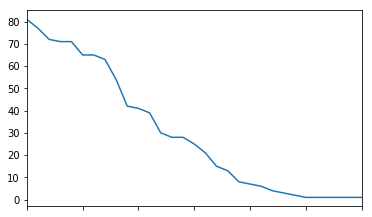

In [18]:
df_fallecidos["DIAS_ENF"].value_counts().plot()

In [19]:
df_fallecidos["DIAS_ENF"].describe()

count                       937
mean     8 days 04:56:36.371398
std      5 days 06:46:51.039472
min             0 days 00:00:00
25%             4 days 00:00:00
50%             7 days 00:00:00
75%            11 days 00:00:00
max            34 days 00:00:00
Name: DIAS_ENF, dtype: object

La descripción de la columna anterior muestra que la mitad de los fallecidos mueren a los 7 días de percibir los síntomas.
El 75% de los fallecidos mueren después de los 11 días de los primeros síntomas.

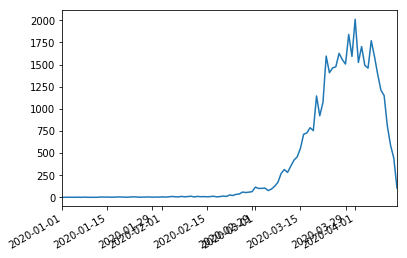

In [25]:
%matplotlib inline
df["FECHA_SINTOMAS"].value_counts().plot()

In [24]:
df[df["FECHA_INGRESO"] == df["FECHA_SINTOMAS"]].shape

(6507, 34)

Hay ... casos que fueron ingresados a la unidad correspondiente el mismo día que presentaron los síntomas